### Problem Defnition

#### Term Deposit Sale

Using the collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 
Resources Available
The historical data for this project is available in file

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Data Set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Attribute information
Input variables:
### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
from IPython.display import HTML, display

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve,auc
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [169]:
df=pd.read_csv('bank-full.csv')

In [170]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [172]:
df.shape

(45211, 17)

In [173]:
# Number of Columns has null values

df[df.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


In [174]:
# Finding unique data
df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

### Describe Data

There are catogerical attributes in the data set which needs to be formated properly

In [175]:
# knowing the categorical variables
print('Jobs:\n', df['job'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [176]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [177]:
print('marital:\n', df['marital'].unique())

marital:
 ['married' 'single' 'divorced']


In [178]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [179]:
print('education:\n', df['education'].unique())

education:
 ['tertiary' 'secondary' 'unknown' 'primary']


In [180]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [181]:
print('default:\n', df['default'].unique())

default:
 ['no' 'yes']


In [182]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [183]:
print('housing:\n', df['housing'].unique())

housing:
 ['yes' 'no']


In [184]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [185]:
print('loan:\n', df['loan'].unique())

loan:
 ['no' 'yes']


In [186]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [187]:
print('contact:\n', df['contact'].unique())

contact:
 ['unknown' 'cellular' 'telephone']


In [188]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [189]:
print('month:\n', df['month'].unique())

month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [190]:
df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [191]:
print('poutcome:\n', df['poutcome'].unique())

poutcome:
 ['unknown' 'failure' 'other' 'success']


In [192]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [193]:
print('Target:\n', df['Target'].unique())

Target:
 ['no' 'yes']


In [194]:
df.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

### Some catagorical attributes contains unknown values which may further effect the model building. May be we can remove these values. Instead of remove may be I can take another copy of data by replace unknown in each column to the most frequent in that column and train models seperatly in order to see how much model accurecy imporved with unkown and with out.

In [195]:
df2 = df.copy()

In [196]:
df2.shape

(45211, 17)

In [197]:
#replace unknown in each column to the most frequent in that column
unknown = {"job": {"unknown": "blue-collar"},
          "marital": {"unknown": "married"},
          "education": {"unknown": "secondary"},
          "contact": {"unknown": "cellular"},
          "poutcome": {"unknown": "failure"}}
df2.replace(unknown,inplace = True)

### Distribution of Target Attribute

In [198]:
df["Target"].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

#### Analysis
The number of data points for customers who are relatively more likely to subscribe term deposit are very low when compared to customers not subscribe the term deposit offered. This may affect the model.

### Distribution of Indipendent Attributes

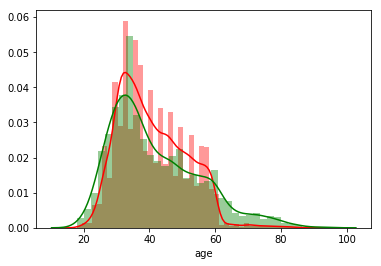

In [32]:
sns.distplot( df[df['Target'] == 'no']['age'], color = 'r')
sns.distplot( df[df['Target'] == 'yes']['age'], color = 'g')

We can see from the above plot clients almost age starting from 18 to 95 are intreseted to subscribe term deposit, so age is not good attribute to predict if the client will subscribe (yes/no) a term deposit. It may not effect target attribute.
Lets calculate number of outliers for age and see if we can remove outliers will that improve the situation.

In [199]:
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

## Lets calculate all Quartiles

print('Q1: ', df['age'].quantile(q = 0.25))
print('Q2: ', df['age'].quantile(q = 0.50))
print('Q3: ', df['age'].quantile(q = 0.75))
print('Q4: ', df['age'].quantile(q = 1.00))

print('Outliers Upper whisker: ', df['age'].quantile(q = 0.75) + 
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)))

print('Outliers Lower whisker: ', df['age'].quantile(q = 0.25) -
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)))

Q1:  33.0
Q2:  39.0
Q3:  48.0
Q4:  95.0
Outliers Upper whisker:  70.5
Outliers Lower whisker:  10.5


##### We can see age above 70.5 are outliers

In [200]:
# Lets find the count of outliers from the data
print('Numerber of outliers: ', df[df['age'] > 70.5]['age'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['age'] > 70.5]['age'].count()*100/len(df), 3), '%')

Numerber of outliers:  487
Number of clients:  45211
Outliers are: 1.077 %


We can see that outlier count is very less around 1% out of total data and I dont think even if we ignore outliers situation will not improve much.

Lets analyse other attribute, how much they effect the traget attribute.

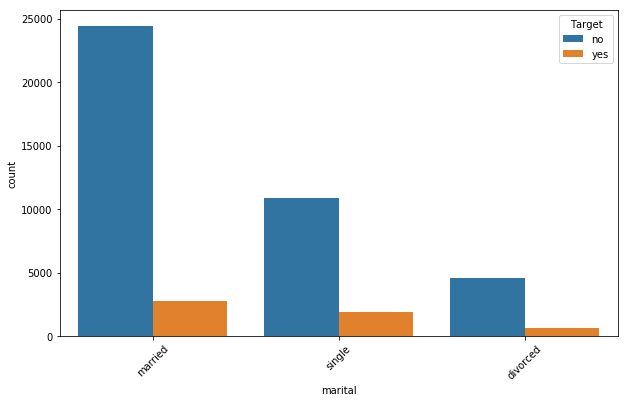

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='Target', data=df)
plt.xticks(rotation=45)
plt.show()

We can see from the above plot there are high chances of married clients intreseted to subscribe term deposit. 

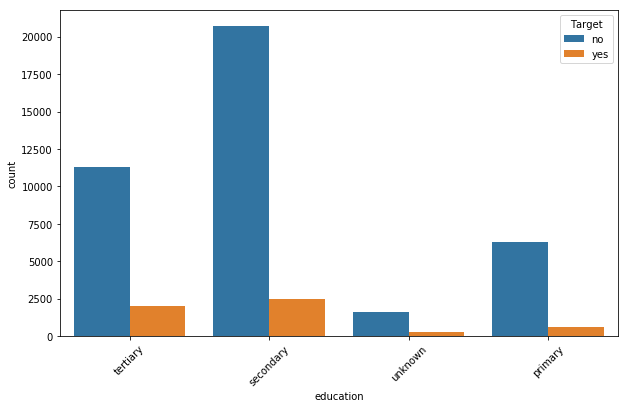

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='Target', data=df)
plt.xticks(rotation=45)
plt.show()

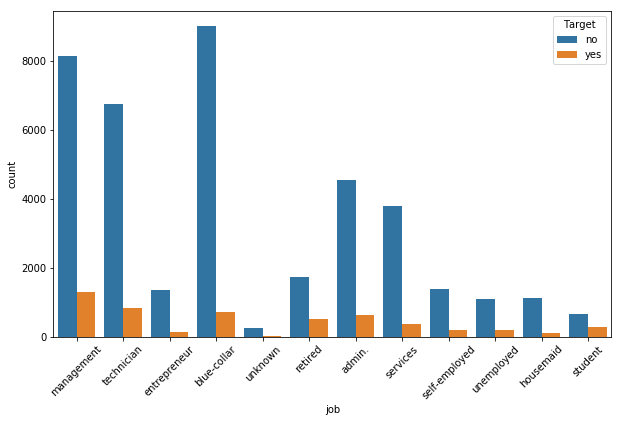

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='Target', data=df)
plt.xticks(rotation=45)
plt.show()

Persons are under management Jobs are opted for Term deposits more.

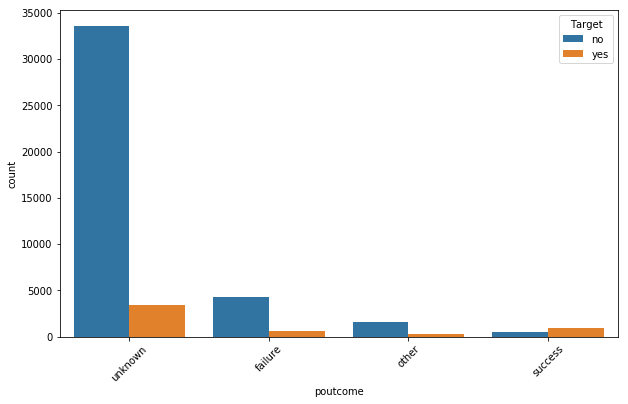

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='Target', data=df)
plt.xticks(rotation=45)
plt.show()

In [201]:
# Converting Categorical variables
X_label = LabelEncoder()

df['job'] = X_label.fit_transform(df['job'])
df['marital'] = X_label.fit_transform(df['marital'])
df['education'] = X_label.fit_transform(df['education'])
df['default'] = X_label.fit_transform(df['default'])
df['housing'] = X_label.fit_transform(df['housing'])
df['loan'] = X_label.fit_transform(df['loan'])
df['contact'] = X_label.fit_transform(df['contact'])
df['month'] = X_label.fit_transform(df['month'])
df['poutcome'] = X_label.fit_transform(df['poutcome'])
df['Target'] = X_label.fit_transform(df['Target'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [202]:
# Converting Categorical variables
X_label = LabelEncoder()

df2['job'] = X_label.fit_transform(df['job'])
df2['marital'] = X_label.fit_transform(df['marital'])
df2['education'] = X_label.fit_transform(df['education'])
df2['default'] = X_label.fit_transform(df['default'])
df2['housing'] = X_label.fit_transform(df['housing'])
df2['loan'] = X_label.fit_transform(df['loan'])
df2['contact'] = X_label.fit_transform(df['contact'])
df2['month'] = X_label.fit_transform(df['month'])
df2['poutcome'] = X_label.fit_transform(df['poutcome'])
df2['Target'] = X_label.fit_transform(df['Target'])
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [203]:
#There are negative values observed with pdays attribute, lets clean those 
df['pdays'] = df['pdays'].abs()

In [204]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [205]:
#There are negative values observed with pdays attribute, lets clean those 
df2['pdays'] = df2['pdays'].abs()

In [206]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


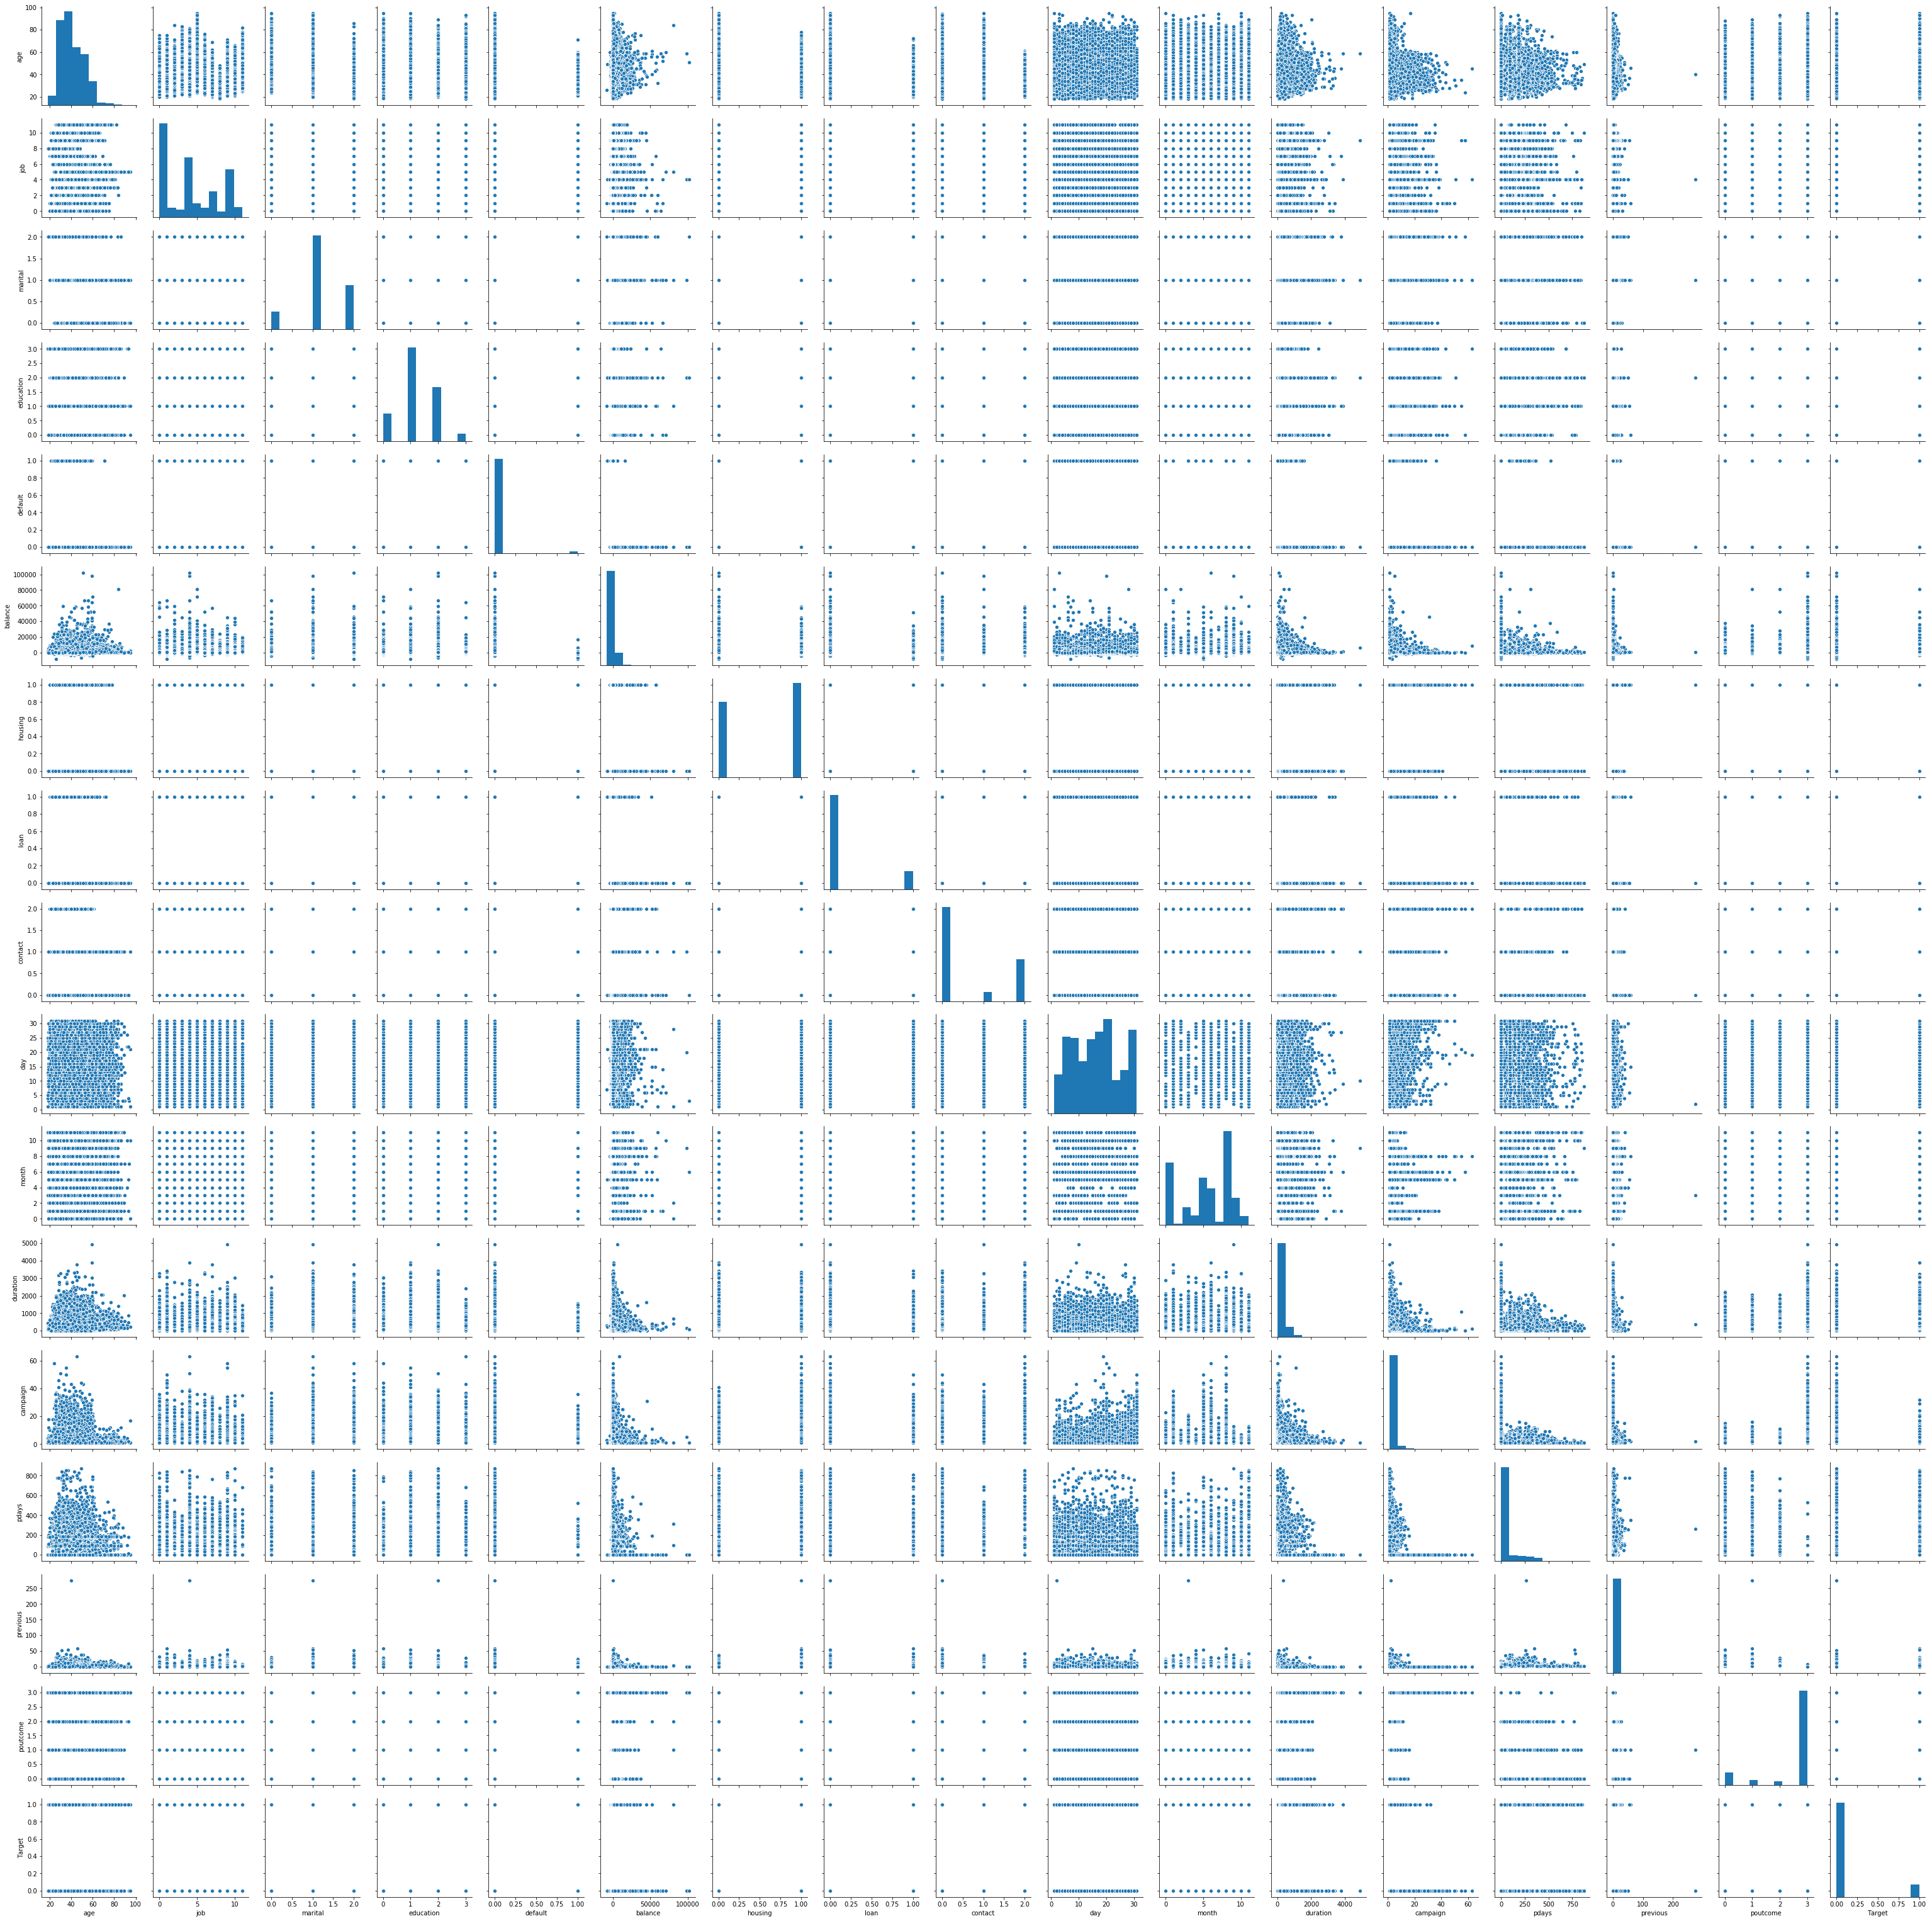

In [45]:
sns.pairplot(df)

In [ ]:
sns.pairplot(df, hue='Target')

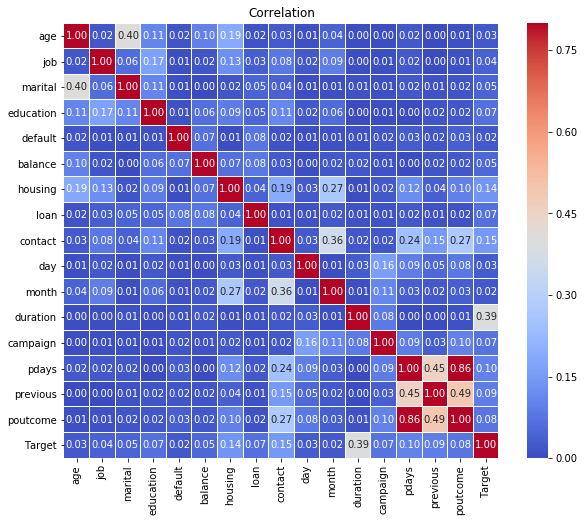

In [41]:
# Lets draw correlation chart using original df

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().abs(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01, cmap='coolwarm')
plt.title('Correlation')
plt.show()

From the above chart I can see there is a high correlation between pdays and poutcome. We can drop pdays or poutcome, i am going to drop pdays because poutcome will give info about previous campaigns out come which gives better knwoledge about clients who are already taken term deposits and who are not taken yet.

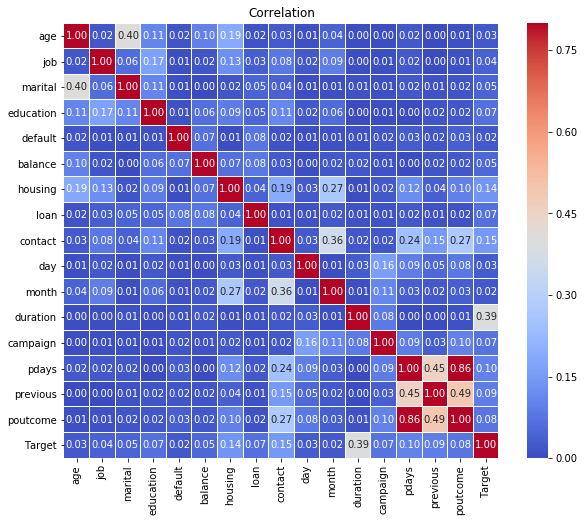

In [40]:
# Lets draw correlation chart using second df2

plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr().abs(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01, cmap='coolwarm')
plt.title('Correlation')
plt.show()

Even after replace unknown in each column to the most frequent in that column also, other than high correlation between pdays and poutcome there is no much difference in correlation between other independent attributes. So lets use dataframe 2 to build and trail our models

# Model Build

#### Split the data into training and test set in the ratio of 70:30 respectively

In [207]:
# As we said above lets drop colums pdays as its highly correlted poutcome, we need poutcome column to avoild already success cases
X = df2.drop(['pdays','Target'], axis=1)
y = df2['Target']

In [208]:
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Lets use standard classification models (Logistic, K-NN and Decision Tree) to predict the model accurecy, after that lets use ensamble methods and compare with standard models

In [209]:
#Logistic Regression
modelLog1 = LogisticRegression()
modelLog1.fit(X_train,y_train)
y_predict = modelLog1.predict(X_test)

t=list(X_train.columns)
coef_df = pd.DataFrame(modelLog1.coef_, columns= t)
coef_df['intercept'] = modelLog1.intercept_
print('Contribution of features toward target values:')
print(coef_df)

Contribution of features toward target values:
        age      job   marital  education   default  balance   housing  \
0 -0.004283 -0.00257  0.077036   0.107991 -0.176231  0.00002 -1.194621   

       loan   contact       day     month  duration  campaign  previous  \
0 -0.764026 -0.631817 -0.011503  0.030389  0.003894 -0.142303  0.110736   

   poutcome  intercept  
0 -0.084439  -1.991518  


In [210]:
# Calculate score and print confusion Matrix
modelLog1_score = modelLog1.score(X_test, y_test)
print('Model score:')
print(modelLog1_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.8913299911530522


Confusion Matrix:
[[11763   243]
 [ 1231   327]]


Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.57      0.21      0.31      1558

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



Model Accuracy is 0.89

True Positive = 327

True Negative = 11763

False Positive = 243

False Negative = 1231

Recall - Specificity
TN / (TN + FP)

For all NEGATIVE(0) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 11763 + 243 = 12006 clients that didin't subscribe(0), and our model predict 98% correct or 11763 correct and 243 incorrect.

In [211]:
print('Specificity/ Recall 0 : ', round(11763 /(11763 + 243),2))

Specificity/ Recall 0 :  0.98


In [212]:
print('Specificity/ Recall 1 : ', round(327 /(327 + 1231),2))

Specificity/ Recall 1 :  0.21


In [213]:
# Lets print Logistic regression summary to see can we imporve the model by droping any other columns
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.276372
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: Target           AIC:              25020.1333
Date:               2019-08-30 15:20 BIC:              25150.9198
No. Observations:   45211            Log-Likelihood:   -12495.   
Df Model:           14               LL-Null:          -16315.   
Df Residuals:       45196            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
age          -0.0230    0.0012  -19.9441  0.0000  -0.0253  -0.0208
job          -0.0154    0.0051   -2.9992  0.0027  -0.0255  -0.

In [214]:
model_ols=sm.OLS(y,X).fit()
HTML(
(model_ols.summary()
    .as_html()
    .replace('<th>Dep. Variable:</th>', '<th style="background-color:#c7e9c0;"> Dep. Variable: </th>')
    .replace('<th>Model:</th>', '<th style="background-color:#c7e9c0;"> Model: </th>')
    .replace('<th>Method:</th>', '<th style="background-color:#c7e9c0;"> Method: </th>')
    .replace('<th>No. Observations:</th>', '<th style="background-color:#c7e9c0;"> No. Observations: </th>')
    .replace('<th>  R-squared:         </th>', '<th style="background-color:#aec7e8;"> R-squared: </th>')
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

Form the model summary we observe that Education and Month has p value greater than 0.05, so lets drop these columns and train the model once again.

In [215]:
X = df2.drop(['pdays','education','month','Target'], axis=1)
y = df2['Target']

In [216]:
X.columns

Index(['age', 'job', 'marital', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'duration', 'campaign', 'previous', 'poutcome'],
      dtype='object')

In [217]:
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [218]:
modelLogt = LogisticRegression()
modelLogt.fit(X_train, y_train)

y_predict = modelLogt.predict(X_test)

t=list(X_train.columns)
coef_df = pd.DataFrame(modelLogt.coef_, columns= t)
coef_df['intercept'] = modelLogt.intercept_
print('Contribution of features toward target values:')
print(coef_df)

Contribution of features toward target values:
        age       job   marital   default   balance   housing      loan  \
0  0.003088  0.005938  0.219264 -0.237766  0.000023 -0.999195 -0.723096   

    contact       day  duration  campaign  previous  poutcome  intercept  
0 -0.638592 -0.008307  0.003894  -0.14276  0.116448 -0.065507  -2.400756  


In [219]:
# Calculate score and print confusion Matrix

modelLogt_score = modelLogt.score(X_test, y_test)
print('Model score:')
print(modelLogt_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.8918460631082277


Confusion Matrix:
[[11779   227]
 [ 1240   318]]


Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12006
           1       0.58      0.20      0.30      1558

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



### after droping further attributes
Model Accuracy is 0.89

True Positive = 318

True Negative = 11779

False Positive = 227

False Negative = 1240

Recall - Specificity
TN / (TN + FP)

For all NEGATIVE(0) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 11779 + 227 = 12006 clients that didin't subscribe(0), and our model predict 98% correct or 11779 correct and 227 incorrect.

In [220]:
print('Training score : ' , modelLogt.score(X_train,y_train))
Training_score_log = modelLogt.score(X_train,y_train)
 
print('Test score : ' , round(modelLogt.score(X_test,y_test),2))
Test_score_log = modelLogt.score(X_test,y_test)

print("Accuracy:",accuracy_score(y_test, y_predict))
Accuracy_log = accuracy_score(y_test, y_predict)
print("Precision:",precision_score(y_test, y_predict))
Precision_log = precision_score(y_test, y_predict)
print("Recall:",recall_score(y_test, y_predict))
Recall_log = recall_score(y_test, y_predict)

y_pred_probalog  = modelLogt.predict_proba(X_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probalog))
auc_log = roc_auc_score(y_test,y_pred_probalog)

Training score :  0.8891838088918381
Test score :  0.89
Accuracy: 0.8918460631082277
Precision: 0.5834862385321101
Recall: 0.20410783055198972
AUC: 0.8655431591008091


In [221]:
# Lets print Logistic regression summary to see can we imporve the model by droping any other columns
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.276414
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: Target           AIC:              25019.8862
Date:               2019-08-30 15:20 BIC:              25133.2344
No. Observations:   45211            Log-Likelihood:   -12497.   
Df Model:           12               LL-Null:          -16315.   
Df Residuals:       45198            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
age          -0.0224    0.0011  -20.4308  0.0000  -0.0245  -0.0202
job          -0.0140    0.0051   -2.7677  0.0056  -0.0239  -0.

In [222]:
model_ols=sm.OLS(y,X).fit()
HTML(
(model_ols.summary()
    .as_html()
    .replace('<th>Dep. Variable:</th>', '<th style="background-color:#c7e9c0;"> Dep. Variable: </th>')
    .replace('<th>Model:</th>', '<th style="background-color:#c7e9c0;"> Model: </th>')
    .replace('<th>Method:</th>', '<th style="background-color:#c7e9c0;"> Method: </th>')
    .replace('<th>No. Observations:</th>', '<th style="background-color:#c7e9c0;"> No. Observations: </th>')
    .replace('<th>  R-squared:         </th>', '<th style="background-color:#aec7e8;"> R-squared: </th>')
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

#### Even the dropping of attributes education and month the R-Squared and Adj.R-Squared are not changed, so we can drop these columns as well even the model accurecy is same.

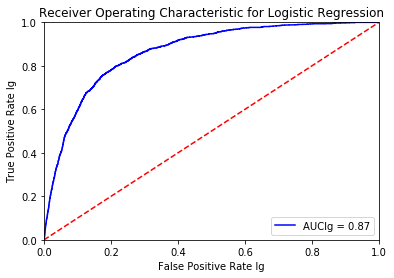

In [223]:
# Lets plot ROC AUC curve
y_pred_probalog  = modelLogt.predict_proba(X_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probalog)
auc_log = roc_auc_score(y_test,y_pred_probalog)

plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_log)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

To check the effect to scaling on the dataset, lets create a seperate dataset with scaled values... We can use scale or Z score function to scale the dataset.

In [227]:
from sklearn import preprocessing
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=15)

In [228]:
modelLog2 = LogisticRegression()
modelLog2.fit(ZX_train, y_train)

y_predict1 = modelLog2.predict(ZX_test)

print('Contribution of features toward target values:')
coef_df = pd.DataFrame(modelLog2.coef_, columns= t)
coef_df['intercept'] = modelLog2.intercept_
print(coef_df)

Contribution of features toward target values:
        age       job   marital   default   balance   housing      loan  \
0  0.066194  0.040263  0.150599 -0.050469  0.065818 -0.468185 -0.281251   

   contact       day  duration  campaign  previous  poutcome  intercept  
0 -0.55974 -0.033054  1.020284 -0.417985  0.204929 -0.096716  -2.654324  


In [229]:
# Calculate score and print confusion Matrix

modelLog2_score = modelLog2.score(ZX_test, y_test)
print('Model score:')
print(modelLog2_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict1))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_predict1))

Model score:
0.8939840754939545


Confusion Matrix:
[[11810   222]
 [ 1216   316]]


Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12032
           1       0.59      0.21      0.31      1532

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.75      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [230]:
print('Training score : ' , modelLog2.score(ZX_train,y_train))
Training_score_log1 = modelLog2.score(ZX_train,y_train)
 
print('Test score : ' , round(modelLog2.score(ZX_test,y_test),2))
Test_score_log1 = modelLog2.score(ZX_test,y_test)

print("Accuracy:",accuracy_score(y_test, y_predict1))
Accuracy_log1 = accuracy_score(y_test, y_predict1)
print("Precision:",precision_score(y_test, y_predict1))
Precision_log1 = precision_score(y_test, y_predict1)
print("Recall:",recall_score(y_test, y_predict1))
Recall_log1 = recall_score(y_test, y_predict1)

y_pred_probalog1  = modelLog2.predict_proba(ZX_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probalog1))
auc_log1 = roc_auc_score(y_test,y_pred_probalog1)

Training score :  0.8886782317439251
Test score :  0.89
Accuracy: 0.8939840754939545
Precision: 0.587360594795539
Recall: 0.206266318537859
AUC: 0.8682774459578635


Even the scalled data there is no much improvement in overal accurecy and class level accurecy, but there is a improbement in confusion matrix to identify false postives litlle bit better.

False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.

False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.

In my opinion:

The first one its most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings

The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client

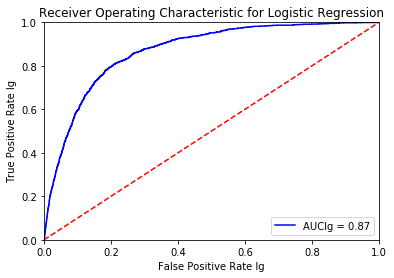

In [231]:
# Lets plot ROC AUC curve
y_pred_probalog1  = modelLog2.predict_proba(ZX_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probalog1)
auc_log1 = roc_auc_score(y_test,y_pred_probalog1)

plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_log1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

##### k-Nearest Neighbors (KNN)

In [232]:
X = df2.drop(['pdays','education','month','Target'], axis=1)
y = df2['Target']
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [233]:
NNH_1 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH_1.fit(X_train, y_train)
y_predict = NNH_1.predict(X_test)

NNH_1_score = NNH_1.score(X_test, y_test)

print('Model score:')
print(NNH_1_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.8703922146859333


Confusion Matrix:
[[11426   604]
 [ 1154   380]]


Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     12030
           1       0.39      0.25      0.30      1534

   micro avg       0.87      0.87      0.87     13564
   macro avg       0.65      0.60      0.62     13564
weighted avg       0.85      0.87      0.86     13564



In [234]:
print('Training score : ' , NNH_1.score(X_train,y_train))
Training_score_knn = NNH_1.score(X_train,y_train)

print('Test score : ' ,(NNH_1.score(X_test,y_test)))
Test_score_knn = NNH_1.score(X_test,y_test)

print("Accuracy:",accuracy_score(y_test, y_predict))
Accuracy_knn = accuracy_score(y_test, y_predict)

print("Precision:",precision_score(y_test, y_predict))
Precision_knn = precision_score(y_test, y_predict)

print("Recall:",recall_score(y_test, y_predict))
Recall_knn = recall_score(y_test, y_predict)

y_pred_probaknn  = NNH_1.predict_proba(X_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probaknn))
auc_knn = roc_auc_score(y_test,y_pred_probaknn)

Training score :  1.0
Test score :  0.8703922146859333
Accuracy: 0.8703922146859333
Precision: 0.3861788617886179
Recall: 0.24771838331160365
AUC: 0.6917200967594053


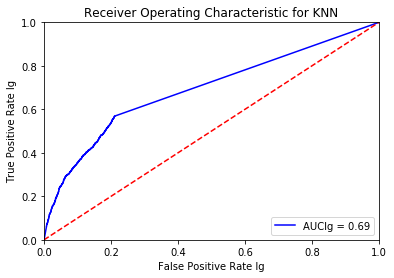

In [235]:
# Lets plot ROC AUC curve
y_pred_probaknn  = NNH_1.predict_proba(X_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probaknn)
auc_knn = roc_auc_score(y_test,y_pred_probaknn)

plt.title('Receiver Operating Characteristic for KNN')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

In [236]:
# cross validation
#Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
#classification error
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [237]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
print(ac_scores)
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

[0.8451046888823356, 0.871129460336184, 0.8819669713948688, 0.8881598348569744, 0.8882335594219994, 0.8895606015924507, 0.8897080507225007, 0.892288410498378, 0.8912562665880271, 0.8928782070185786]
The optimal number of neighbors is 19


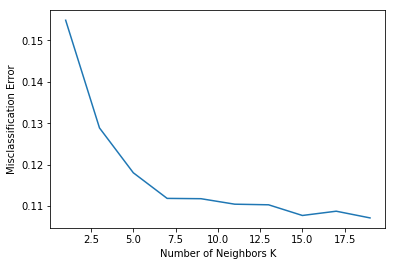

In [238]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

##### Let apply scaled data to k-Nearest Neighbors (KNN)

In [239]:
from sklearn import preprocessing
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

In [240]:
NNH_2 = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
NNH_2.fit(ZX_train, y_train)
y_predict = NNH_2.predict(ZX_test)

NNH_2_score = NNH_2.score(ZX_test, y_test)

print('Model score:')
print(NNH_2_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.8964907107048068


Confusion Matrix:
[[11676   330]
 [ 1074   484]]

:
Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12006
           1       0.59      0.31      0.41      1558

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



In [241]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(ZX_train, y_train)
    # predict the response
    y_pred = knn.predict(ZX_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
print(ac_scores)
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

[0.868843998820407, 0.8870539663815984, 0.8928044824535535, 0.8958271896195813, 0.8964169861397818, 0.8956797404895311, 0.8980389265703332, 0.8968593335299322, 0.8980389265703332, 0.897817752875258]
The optimal number of neighbors is 13


In [242]:
print('Training score : ' , NNH_2.score(ZX_train,y_train))
Training_score_knn1 = NNH_2.score(ZX_train,y_train)

print('Test score : ' ,(NNH_2.score(ZX_test,y_test)))
Test_score_knn1 = NNH_2.score(ZX_test,y_test)

print("Accuracy:",accuracy_score(y_test, y_predict))
Accuracy_knn1 = accuracy_score(y_test, y_predict)

print("Precision:",precision_score(y_test, y_predict))
Precision_knn1 = precision_score(y_test, y_predict)

print("Recall:",recall_score(y_test, y_predict))
Recall_knn1 = recall_score(y_test, y_predict)

y_pred_probaknn1  = NNH_2.predict_proba(ZX_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probaknn1))
auc_knn1 = roc_auc_score(y_test,y_pred_probaknn1)

Training score :  1.0
Test score :  0.8964907107048068
Accuracy: 0.8964907107048068
Precision: 0.5945945945945946
Recall: 0.31065468549422337
AUC: 0.8383756613349296


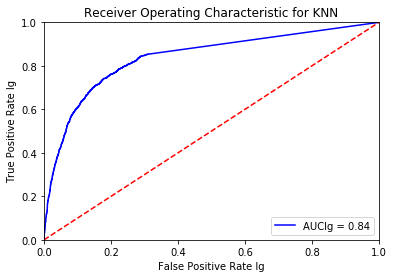

In [243]:
# Lets plot ROC AUC curve
y_pred_probaknn1  = NNH_2.predict_proba(ZX_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probaknn1)
auc_knn1 = roc_auc_score(y_test,y_pred_probaknn1)

plt.title('Receiver Operating Characteristic for KNN')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_knn1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

With scalled data there is a improvement in class level accurecy and also improbement in confusion matrix to identify false postives litlle bit better.

False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.

False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.

In my opinion:

The first one its most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings

The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client

##### Decision Tree

In [244]:
X = df2.drop(['pdays','education','month','Target'], axis=1)
y = df2['Target']
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [245]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

test_pred = dt_model.predict(X_test)
dt_model_score = dt_model.score(X_test , y_test)

print('Model score:')
print(dt_model_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, y_predict))


Model score:
0.86670598643468


Confusion Matrix:
[[11263   727]
 [ 1487    87]]

:
Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11990
           1       0.11      0.06      0.07      1574

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.50      0.50      0.49     13564
weighted avg       0.79      0.84      0.81     13564



In [246]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))#Print the feature importance of the decision model

               Imp
age       0.116221
job       0.052671
marital   0.020989
default   0.001043
balance   0.148047
housing   0.029194
loan      0.011851
contact   0.042385
day       0.097087
duration  0.329046
campaign  0.043898
previous  0.051888
poutcome  0.055680


In [247]:
print('Training score : ' , dt_model.score(X_train,y_train))
Training_score_tree = dt_model.score(X_train,y_train)

print('Test score : ' ,(dt_model.score(X_test,y_test)))
Test_score_tree = dt_model.score(X_test,y_test)

print("Accuracy:",accuracy_score(y_test, test_pred))
Accuracy_tree = accuracy_score(y_test, test_pred)

print("Precision:",precision_score(y_test, test_pred))
Precision_tree = precision_score(y_test, test_pred)

print("Recall:",recall_score(y_test, test_pred))
Recall_tree = recall_score(y_test, test_pred)

y_pred_probatree  = dt_model.predict_proba(X_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probatree))
auc_tree = roc_auc_score(y_test,y_pred_probatree)

Training score :  1.0
Test score :  0.86670598643468
Accuracy: 0.86670598643468
Precision: 0.4255725190839695
Recall: 0.4250317662007624
AUC: 0.6748595027834504


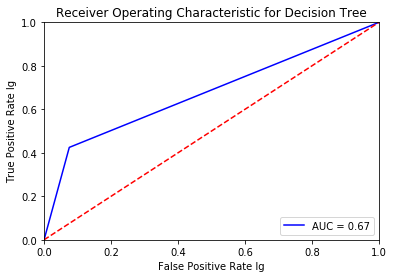

In [248]:
# Lets plot ROC AUC curve
y_pred_probatree  = dt_model.predict_proba(X_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probatree)
auc_tree = roc_auc_score(y_test,y_pred_probatree)

plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_tree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

Lets build the model with scalled data

In [250]:
from sklearn import preprocessing
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=25)

In [251]:
dt_model1 = DecisionTreeClassifier(criterion = 'entropy' )
dt_model1.fit(ZX_train, y_train)

test_pred1 = dt_model1.predict(ZX_test)
dt_model_score1 = dt_model1.score(ZX_test , y_test)

print('Model score:')
print(dt_model_score1)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, y_predict))

Model score:
0.8682542023002064


Confusion Matrix:
[[11263   727]
 [ 1487    87]]

:
Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11990
           1       0.11      0.06      0.07      1574

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.50      0.50      0.49     13564
weighted avg       0.79      0.84      0.81     13564



In [252]:
print('Training score : ' , dt_model1.score(ZX_train,y_train))
Training_score_tree1 = dt_model1.score(ZX_train,y_train)

print('Test score : ' ,(dt_model1.score(ZX_test,y_test)))
Test_score_tree1 = dt_model.score(ZX_test,y_test)

print("Accuracy:",accuracy_score(y_test, test_pred1))
Accuracy_tree1 = accuracy_score(y_test, test_pred1)

print("Precision:",precision_score(y_test, test_pred1))
Precision_tree1 = precision_score(y_test, test_pred1)

print("Recall:",recall_score(y_test, test_pred1))
Recall_tree1 = recall_score(y_test, test_pred1)

y_pred_probatree1  = dt_model1.predict_proba(ZX_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probatree1))
auc_tree1 = roc_auc_score(y_test,y_pred_probatree1)

Training score :  1.0
Test score :  0.8682542023002064
Accuracy: 0.8682542023002064
Precision: 0.4317745035233824
Recall: 0.42820838627700125
AUC: 0.6771150355071411


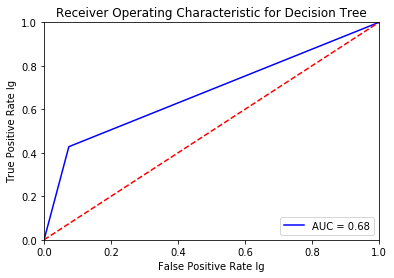

In [253]:
# Lets plot ROC AUC curve
y_pred_probatree1  = dt_model1.predict_proba(ZX_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probatree1)
auc_tree1 = roc_auc_score(y_test,y_pred_probatree1)

plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_tree1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

### Ensemble Methods

### Bagging Ensemble Algorithm

In [356]:
X = df2.drop(['pdays','education','month','Target'], axis=1)
y = df2['Target']

In [357]:
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [358]:
# In the following lines, we call the bagging classifer with oob_score (out of bag score) set to true which false by default
# This makes the baggingclassifier use the 37% unused data for testing
# Compare the performance of the BGCL with regularized dt above. 
# Though not required, you can keep separate test data (outside the bootstrap sampling) on which we test the BGCL
# 

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples=.7 , oob_score=True)

bgcl = bgcl.fit(X_train, y_train)

bag_pred = bgcl.predict(X_test)
bgcl_score = bgcl.score(X_test , y_test)

print('Model score:')
print(bgcl_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, bag_pred))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, bag_pred))

Model score:
0.9008404600412857


Confusion Matrix:
[[11634   396]
 [  949   585]]

:
Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12030
           1       0.60      0.38      0.47      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [359]:
print('Training score : ' , bgcl.score(X_train,y_train))
Training_score_bgcl = bgcl.score(X_train,y_train)

print('Test score : ' ,(bgcl.score(X_test,y_test)))
Test_score_bgcl = bgcl.score(X_test,y_test)

print("Accuracy:",accuracy_score(y_test, bag_pred))
Accuracy_bgcl = accuracy_score(y_test, bag_pred)

print("Precision:",precision_score(y_test, bag_pred))
Precision_bgcl = precision_score(y_test, bag_pred)

print("Recall:",recall_score(y_test, bag_pred))
Recall_bgcl = recall_score(y_test, bag_pred)

y_pred_probabgcl  = bgcl.predict_proba(X_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probabgcl))
auc_bgcl = roc_auc_score(y_test,y_pred_probabgcl)

Training score :  0.991152399911524
Test score :  0.9008404600412857
Accuracy: 0.9008404600412857
Precision: 0.5963302752293578
Recall: 0.3813559322033898
AUC: 0.8915944601772405


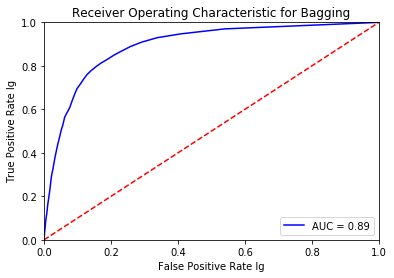

In [360]:
# Lets plot ROC AUC curve
y_pred_probabgcl  = bgcl.predict_proba(X_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probabgcl)
auc_bgcl = roc_auc_score(y_test,y_pred_probabgcl)

plt.title('Receiver Operating Characteristic for Bagging')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_bgcl)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

In [361]:
from sklearn import preprocessing
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=15)

In [362]:
from sklearn.ensemble import BaggingClassifier
bgcl1 = BaggingClassifier(n_estimators=50, max_samples=.7 , oob_score=True)

bgcl1 = bgcl1.fit(ZX_train, y_train)

bag_pred1 = bgcl1.predict(ZX_test)
bgcl_score1 = bgcl1.score(ZX_test , y_test)

print('Model score:')
print(bgcl_score1)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, bag_pred1))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, bag_pred1))

Model score:
0.8977440283102329


Confusion Matrix:
[[11574   458]
 [  929   603]]

:
Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     12032
           1       0.57      0.39      0.47      1532

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.75      0.68      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [363]:
print('Training score : ' , bgcl1.score(ZX_train,y_train))
Training_score_bgcl1 = bgcl1.score(ZX_train,y_train)

print('Test score : ' ,(bgcl1.score(ZX_test,y_test)))
Test_score_bgcl1 = bgcl1.score(ZX_test,y_test)

print("Accuracy:",accuracy_score(y_test, bag_pred1))
Accuracy_bgcl1 = accuracy_score(y_test, bag_pred1)

print("Precision:",precision_score(y_test, bag_pred1))
Precision_bgcl1 = precision_score(y_test, bag_pred1)

print("Recall:",recall_score(y_test, bag_pred1))
Recall_bgcl1 = recall_score(y_test, bag_pred1)

y_pred_probabgcl1  = bgcl1.predict_proba(ZX_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probabgcl1))
auc_bgcl1 = roc_auc_score(y_test,y_pred_probabgcl1)

Training score :  0.9908996113375675
Test score :  0.8977440283102329
Accuracy: 0.8977440283102329
Precision: 0.5683317624882187
Recall: 0.3936031331592689
AUC: 0.886932849433712


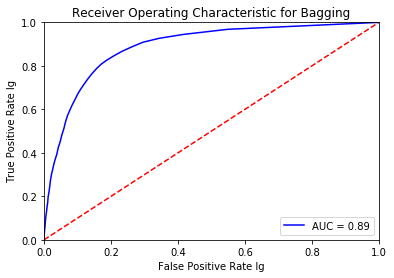

In [364]:
# Lets plot ROC AUC curve
y_pred_probabgcl1  = bgcl1.predict_proba(ZX_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probabgcl1)
auc_bgcl1 = roc_auc_score(y_test,y_pred_probabgcl1)

plt.title('Receiver Operating Characteristic for Bagging')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_bgcl1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

### Adaboost Ensemble Algorithm

In [365]:
X = df2.drop(['pdays','education','month','Target'], axis=1)
y = df2['Target']
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [366]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

abcl_pred = abcl.predict(X_test)
abcl_score = abcl.score(X_test , y_test)

print('Model score:')
print(abcl_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, abcl_pred))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, abcl_pred))

Model score:
0.8951636685343557


Confusion Matrix:
[[11663   369]
 [ 1053   479]]

:
Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12032
           1       0.56      0.31      0.40      1532

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.88      0.90      0.88     13564



In [367]:
print('Training score : ' , abcl.score(X_train,y_train))
Training_score_abcl = abcl.score(X_train,y_train)

print('Test score : ' ,(abcl.score(X_test,y_test)))
Test_score_abcl = abcl.score(X_test,y_test)

print("Accuracy:",accuracy_score(y_test, abcl_pred))
Accuracy_abcl = accuracy_score(y_test, abcl_pred)

print("Precision:",precision_score(y_test, abcl_pred))
Precision_abcl = precision_score(y_test, abcl_pred)

print("Recall:",recall_score(y_test, abcl_pred))
Recall_abcl = recall_score(y_test, abcl_pred)

y_pred_probaabcl  = abcl.predict_proba(X_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probaabcl))
auc_abcl = roc_auc_score(y_test,y_pred_probaabcl)

Training score :  0.8911745189117452
Test score :  0.8951636685343557
Accuracy: 0.8951636685343557
Precision: 0.5648584905660378
Recall: 0.31266318537859006
AUC: 0.8865363870843981


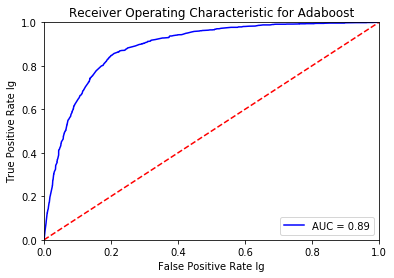

In [368]:
# Lets plot ROC AUC curve
y_pred_probaabcl  = abcl.predict_proba(X_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probaabcl)
auc_abcl = roc_auc_score(y_test,y_pred_probaabcl)

plt.title('Receiver Operating Characteristic for Adaboost')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_abcl)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

In [369]:
from sklearn import preprocessing
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=15)

In [370]:
# Lets train the model with scaled dataset

abcl1 = AdaBoostClassifier( n_estimators= 20)
abcl1 = abcl1.fit(ZX_train, y_train)

abcl_pred1 = abcl1.predict(ZX_test)
abcl_score1 = abcl1.score(ZX_test , y_test)

print('Model score:')
print(abcl_score1)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, abcl_pred1))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, abcl_pred1))

Model score:
0.8951636685343557


Confusion Matrix:
[[11663   369]
 [ 1053   479]]

:
Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12032
           1       0.56      0.31      0.40      1532

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.88      0.90      0.88     13564



In [371]:
print('Training score : ' , abcl1.score(ZX_train,y_train))
Training_score_abcl1 = abcl1.score(ZX_train,y_train)

print('Test score : ' ,(abcl1.score(ZX_test,y_test)))
Test_score_abcl1 = abcl1.score(ZX_test,y_test)

print("Accuracy:",accuracy_score(y_test, abcl_pred1))
Accuracy_abcl1 = accuracy_score(y_test, abcl_pred1)

print("Precision:",precision_score(y_test, abcl_pred1))
Precision_abcl1 = precision_score(y_test, abcl_pred1)

print("Recall:",recall_score(y_test, abcl_pred1))
Recall_abcl1 = recall_score(y_test, abcl_pred1)

y_pred_probaabcl1  = abcl1.predict_proba(ZX_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probaabcl1))
auc_abcl1 = roc_auc_score(y_test,y_pred_probaabcl1)

Training score :  0.8911745189117452
Test score :  0.8951636685343557
Accuracy: 0.8951636685343557
Precision: 0.5648584905660378
Recall: 0.31266318537859006
AUC: 0.8865363870843981


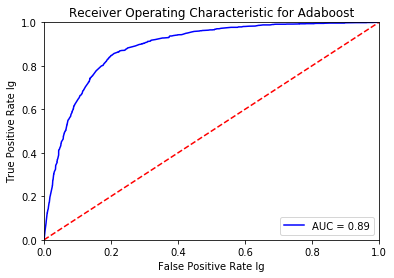

In [372]:
# Lets plot ROC AUC curve
y_pred_probaabcl1  = abcl1.predict_proba(ZX_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probaabcl1)
auc_abcl1 = roc_auc_score(y_test,y_pred_probaabcl1)

plt.title('Receiver Operating Characteristic for Adaboost')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_abcl1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

### GradientBoost Classifier Algorithm

In [373]:
X = df2.drop(['pdays','education','month','Target'], axis=1)
y = df2['Target']
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [374]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)

gbcl_pred = gbcl.predict(X_test)
gbcl_score = gbcl.score(X_test, y_test)

print('Model score:')
print(gbcl_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, gbcl_pred))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, gbcl_pred))

Model score:
0.9017251548215865


Confusion Matrix:
[[11831   175]
 [ 1158   400]]

:
Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12006
           1       0.70      0.26      0.38      1558

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.80      0.62      0.66     13564
weighted avg       0.89      0.90      0.88     13564



In [375]:
print('Training score : ' , gbcl.score(X_train,y_train))
Training_score_gbcl = gbcl.score(X_train,y_train)

print('Test score : ' ,(gbcl.score(X_test,y_test)))
Test_score_gbcl = gbcl.score(X_test,y_test)

print("Accuracy:",accuracy_score(y_test, gbcl_pred))
Accuracy_gbcl = accuracy_score(y_test, gbcl_pred)

print("Precision:",precision_score(y_test, gbcl_pred))
Precision_gbcl = precision_score(y_test, gbcl_pred)

print("Recall:",recall_score(y_test, gbcl_pred))
Recall_gbcl = recall_score(y_test, gbcl_pred)

y_pred_probagbcl  = gbcl.predict_proba(X_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probagbcl))
auc_gbcl = roc_auc_score(y_test,y_pred_probagbcl)

Training score :  0.8976206275476348
Test score :  0.9017251548215865
Accuracy: 0.9017251548215865
Precision: 0.6956521739130435
Recall: 0.25673940949935814
AUC: 0.8916081646810313


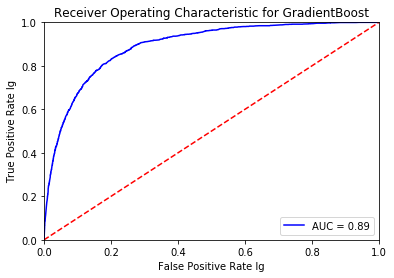

In [376]:
# Lets plot ROC AUC curve
y_pred_probagbcl  = gbcl.predict_proba(X_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probagbcl)
auc_gbcl = roc_auc_score(y_test,y_pred_probagbcl)

plt.title('Receiver Operating Characteristic for GradientBoost')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_gbcl)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

In [377]:
from sklearn import preprocessing
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=15)

In [378]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl1 = GradientBoostingClassifier(n_estimators = 70, learning_rate = 0.05)
gbcl1 = gbcl1.fit(ZX_train, y_train)

gbcl_pred1 = gbcl1.predict(ZX_test)
gbcl_score1 = gbcl1.score(ZX_test, y_test)

print('Model score:')
print(gbcl_score1)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, gbcl_pred1))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, gbcl_pred1))

Model score:
0.9034945443821881


Confusion Matrix:
[[11784   248]
 [ 1061   471]]

:
Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12032
           1       0.66      0.31      0.42      1532

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.79      0.64      0.68     13564
weighted avg       0.89      0.90      0.89     13564



In [379]:
print('Training score : ' , gbcl1.score(ZX_train,y_train))
Training_score_gbcl1 = gbcl1.score(ZX_train,y_train)

print('Test score : ' ,(gbcl1.score(ZX_test,y_test)))
Test_score_gbcl1 = gbcl1.score(ZX_test,y_test)

print("Accuracy:",accuracy_score(y_test, gbcl_pred1))
Accuracy_gbcl1 = accuracy_score(y_test, gbcl_pred1)

print("Precision:",precision_score(y_test, gbcl_pred1))
Precision_gbcl1 = precision_score(y_test, gbcl_pred1)

print("Recall:",recall_score(y_test, gbcl_pred1))
Recall_gbcl1 = recall_score(y_test, gbcl_pred1)

y_pred_probagbcl1  = gbcl1.predict_proba(ZX_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probagbcl1))
auc_gbcl1 = roc_auc_score(y_test,y_pred_probagbcl1)

Training score :  0.9006224918633677
Test score :  0.9034945443821881
Accuracy: 0.9034945443821881
Precision: 0.655076495132128
Recall: 0.3074412532637076
AUC: 0.895737400439559


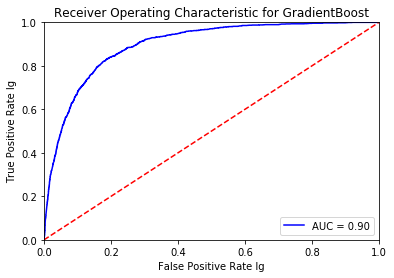

In [380]:
# Lets plot ROC AUC curve
y_pred_probagbcl1  = gbcl1.predict_proba(ZX_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probagbcl1)
auc_gbcl1 = roc_auc_score(y_test,y_pred_probagbcl1)

plt.title('Receiver Operating Characteristic for GradientBoost')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_gbcl1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

### Random forest model

In [381]:
X = df2.drop(['pdays','education','month','Target'], axis=1)
y = df2['Target']
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [382]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)
rfcl_pred = rfcl.predict(X_test)
rfcl_score = rfcl.score(X_test , y_test)

print('Model score:')
print(rfcl_score)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, rfcl_pred))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, rfcl_pred))

Model score:
0.9042317900324388


Confusion Matrix:
[[11670   336]
 [  963   595]]

:
Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12006
           1       0.64      0.38      0.48      1558

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [383]:
print('Training score : ' , rfcl.score(X_train,y_train))
Training_score_rfcl = rfcl.score(X_train,y_train)

print('Test score : ' ,(rfcl.score(X_test,y_test)))
Test_score_rfcl = rfcl.score(X_test,y_test)

print("Accuracy:",accuracy_score(y_test, rfcl_pred))
Accuracy_rfcl = accuracy_score(y_test, rfcl_pred)

print("Precision:",precision_score(y_test, rfcl_pred))
Precision_rfcl = precision_score(y_test, rfcl_pred)

print("Recall:",recall_score(y_test, rfcl_pred))
Recall_rfcl = recall_score(y_test, rfcl_pred)

y_pred_probarfcl  = rfcl.predict_proba(X_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probarfcl))
auc_rfcl = roc_auc_score(y_test,y_pred_probarfcl)

Training score :  1.0
Test score :  0.9042317900324388
Accuracy: 0.9042317900324388
Precision: 0.6390977443609023
Recall: 0.38189987163029526
AUC: 0.90026336318362


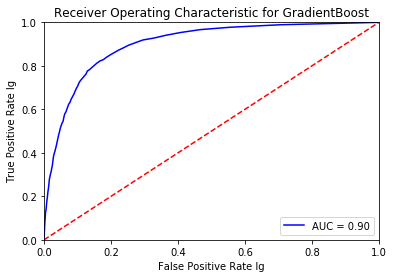

In [384]:
# Lets plot ROC AUC curve
y_pred_probarfcl  = rfcl.predict_proba(X_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probarfcl)
auc_rfcl = roc_auc_score(y_test,y_pred_probarfcl)

plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_rfcl)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

In [385]:
from sklearn import preprocessing
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=15)

In [386]:
from sklearn.ensemble import RandomForestClassifier
rfcl1 = RandomForestClassifier(n_estimators = 100)
rfcl1 = rfcl1.fit(ZX_train, y_train)
rfcl_pred1 = rfcl1.predict(ZX_test)
rfcl_score1 = rfcl1.score(ZX_test , y_test)

print('Model score:')
print(rfcl_score1)
print('\n')
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, rfcl_pred1))
print('\n:')
print('Report:')
print(metrics.classification_report(y_test, rfcl_pred1))

Model score:
0.9006192863462106


Confusion Matrix:
[[11645   387]
 [  961   571]]

:
Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12032
           1       0.60      0.37      0.46      1532

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [387]:
print('Training score : ' , rfcl1.score(ZX_train,y_train))
Training_score_rfcl1 = rfcl1.score(ZX_train,y_train)

print('Test score : ' ,(rfcl1.score(ZX_test,y_test)))
Test_score_rfcl1 = rfcl1.score(ZX_test,y_test)

print("Accuracy:",accuracy_score(y_test, rfcl_pred1))
Accuracy_rfcl1 = accuracy_score(y_test, rfcl_pred1)

print("Precision:",precision_score(y_test, rfcl_pred1))
Precision_rfcl1 = precision_score(y_test, rfcl_pred1)

print("Recall:",recall_score(y_test, rfcl_pred1))
Recall_rfcl1 = recall_score(y_test, rfcl_pred1)

y_pred_probarfcl1  = rfcl1.predict_proba(ZX_test)[::,1]
print("AUC:",roc_auc_score(y_test,y_pred_probarfcl1))
auc_rfcl1 = roc_auc_score(y_test,y_pred_probarfcl1)

Training score :  1.0
Test score :  0.9006192863462106
Accuracy: 0.9006192863462106
Precision: 0.5960334029227558
Recall: 0.3727154046997389
AUC: 0.8994307716411587


In [388]:
#lets create a dataframe
Models= pd.DataFrame({'Training_Score':[Training_score_log,Training_score_knn,Training_score_tree,Training_score_bgcl,Training_score_abcl,Training_score_gbcl,Training_score_rfcl]
,'Test_score' : [Test_score_log,Test_score_knn,Test_score_tree,Test_score_bgcl,Test_score_abcl,Test_score_gbcl,Test_score_rfcl]
,'Accuracy' : [Accuracy_log,Accuracy_knn,Accuracy_tree,Accuracy_bgcl,Accuracy_abcl,Accuracy_gbcl,Accuracy_rfcl]
,'Precision' : [Precision_log,Precision_knn,Precision_tree,Precision_bgcl,Precision_abcl,Precision_gbcl,Precision_rfcl]
,'Recall' : [Recall_log,Recall_knn,Recall_tree,Recall_bgcl,Recall_abcl,Recall_gbcl,Recall_rfcl]
,'AUC' : [auc_log,auc_knn,auc_tree,auc_bgcl,auc_abcl,auc_gbcl,auc_rfcl]},index=['Logistic Regression','KNN','Decision Tree','Bagging','Adaboost','GradientBoost','Random Forest'])
Models

,Training_Score,Test_score,Accuracy,Precision,Recall,AUC
Logistic Regression,0.889184,0.891846,0.891846,0.583486,0.204108,0.865543
KNN,1.000000,0.870392,0.870392,0.386179,0.247718,0.691720
Decision Tree,1.000000,0.866706,0.866706,0.425573,0.425032,0.674860
Bagging,0.991152,0.900840,0.900840,0.596330,0.381356,0.891594
Adaboost,0.891175,0.895164,0.895164,0.564858,0.312663,0.886536
GradientBoost,0.897621,0.901725,0.901725,0.695652,0.256739,0.891608
Random Forest,1.000000,0.904232,0.904232,0.639098,0.381900,0.900263


Now based on the above chart we can decide 

if we need a model which has more accuracy we will go with GradientBoost, Random Forest and Bagging models.

if we need a model which gives better performance with test and train test (no overfit and no under fit) we can go with Logistic Regression, Adaboost and Gradient Boot models which has almost simliar test and train scores

if we need a model which predict more true positives we can go with Decision Tree model which has more Recall value.

If we need a model which has high AUC, we can go with Random Forest model.

If we need a model which has high AUC and also better performance of test and train test, we can go with Gradient Boost model which has 0.891 AUC.


In [390]:
#lets create a dataframe for scalled dataset
Models= pd.DataFrame({'Training_Score':[Training_score_log1,Training_score_knn1,Training_score_tree1,Training_score_bgcl1,Training_score_abcl1,Training_score_gbcl1,Training_score_rfcl1]
,'Test_score' : [Test_score_log1,Test_score_knn1,Test_score_tree1,Test_score_bgcl1,Test_score_abcl1,Test_score_gbcl1,Test_score_rfcl1]
,'Accuracy' : [Accuracy_log1,Accuracy_knn1,Accuracy_tree1,Accuracy_bgcl1,Accuracy_abcl1,Accuracy_gbcl1,Accuracy_rfcl1]
,'Precision' : [Precision_log1,Precision_knn1,Precision_tree1,Precision_bgcl1,Precision_abcl1,Precision_gbcl1,Precision_rfcl1]
,'Recall' : [Recall_log1,Recall_knn1,Recall_tree1,Recall_bgcl1,Recall_abcl1,Recall_gbcl1,Recall_rfcl1]
,'AUC' : [auc_log1,auc_knn1,auc_tree1,auc_bgcl1,auc_abcl1,auc_gbcl1,auc_rfcl1]},index=['Logistic Regression','KNN','Decision Tree','Bagging','Adaboost','GradientBoost','Random Forest'])
Models

,Training_Score,Test_score,Accuracy,Precision,Recall,AUC
Logistic Regression,0.888678,0.893984,0.893984,0.587361,0.206266,0.868277
KNN,1.000000,0.896491,0.896491,0.594595,0.310655,0.838376
Decision Tree,1.000000,0.883958,0.868254,0.431775,0.428208,0.677115
Bagging,0.990900,0.897744,0.897744,0.568332,0.393603,0.886933
Adaboost,0.891175,0.895164,0.895164,0.564858,0.312663,0.886536
GradientBoost,0.900622,0.903495,0.903495,0.655076,0.307441,0.895737
Random Forest,1.000000,0.900619,0.900619,0.596033,0.372715,0.899431


Now based on the above chart we can decide 

if we need a model which has more accuracy we will go with GradientBoost and Random Forest model.

if we need a model which gives better performance with test and train test (no overfit and no under fit) we can go with Logistic Regression, Adaboost and Gradient Boot models which has almost simliar test and train scores

if we need a model which predict more true positives we can go with Decision Tree model which has more Recall value.

If we need a model which has high AUC, we can go with Random Forest model.

If we need a model which has high AUC and also better performance of test and train test, we can go with Gradient Boost model which has 0.895 AUC.

### Lets do Parameter tuning using hyper parameters for some of the models 
### and then see the model performances.

##### RandomForestClassifier
RandomForestClassifier run without any parameter then try to give parameter.

In [428]:
X = df2.drop(['pdays','education','month','Target'], axis=1)
y = df2['Target']
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [409]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)
predict_rfcl = randomforest.predict(X_test)
randomforest_score = round(randomforest.score(X_train,y_train)*100, 2)
randomforest_score

99.06

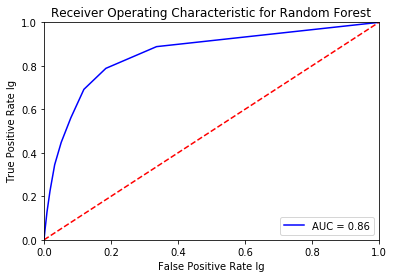

In [410]:
# Lets plot ROC AUC curve
y_pred_probarfcl2  = randomforest.predict_proba(X_test)[::,1]
FPR,TPR,threshold = roc_curve(y_test,y_pred_probarfcl2)
auc_rfcl2 = roc_auc_score(y_test,y_pred_probarfcl2)

plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % auc_rfcl2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate lg')
plt.xlabel('False Positive Rate lg')
plt.show()

Lets use Range of N_estimators

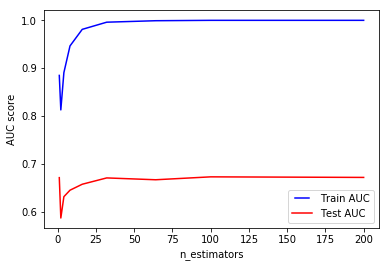

In [411]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results =[]
test_results =[]

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs= -1)
    rf.fit(X_train,y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)

    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC" )
line2, = plt.plot(n_estimators, test_results, 'r', label ="Test AUC")

plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

From the above Graph may around n_estimators=59 is best to train and test the Random Forest model.

Lets try train the model using max_depths parameter with a range

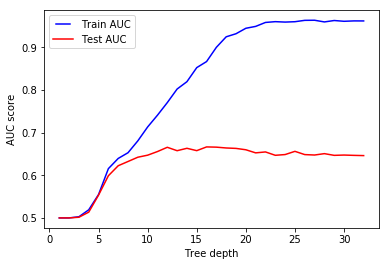

In [412]:
max_depths = np.arange(1, 33, 1)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

Intresting, when the depth parameter value increases model going to be overfit.

Let use min_samples_splits parameter and see the model performance

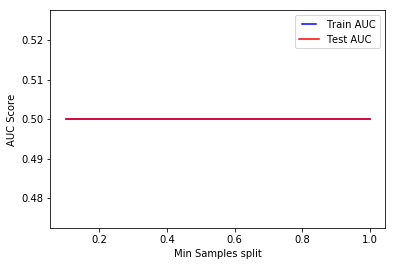

In [413]:
min_samples_splits = np.linspace(0.1, 1.0, 10,  endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split= min_samples_split )
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('Min Samples split')
plt.show()

Intersting: both test and train model giving the same AUC score with any min sample splits in a range. But we need high AUC score to consider the model as a best fit.

Now we will check min_samples_leaf parameter values.

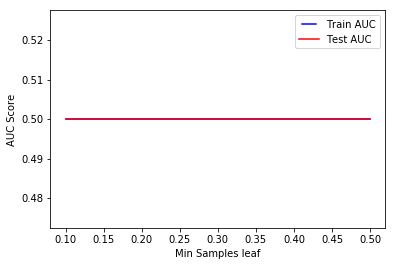

In [414]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results =[]

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D    
line1, = plt.plot(min_samples_leafs,train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('Min Samples leaf')
plt.show()

###### Lets try to max_features

In [436]:
range(0, df2.shape[1])

range(0, 17)

In [ ]:
max_features = list(range(1, df2.shape[1]))
#print(max_features)

train_results =[]
test_results =[]

for max_feature in max_features:
    rf = RandomForestClassifier(max_features = max_feature)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D       
line1, =plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, =plt.plot(max_features, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('Max features')
plt.show()

##### Lets try for GradientBoostingClassifier with some hyper parameters

In [418]:
X = df2.drop(['pdays','education','month','Target'], axis=1)
y = df2['Target']
# Split data into train and test sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [420]:
gbclassifier = GradientBoostingClassifier()
gbclassifier.fit(X_train, y_train)
y_pred = gbclassifier.predict(X_test)

In [421]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC ",round(roc_auc, 2))
print("Score", round(gbclassifier.score(X_train,y_train)*100, 2))

AUC  0.68
Score 90.56


##### Lets try with diffrent Learning_rates

Text(0.5, 0, 'Learn')

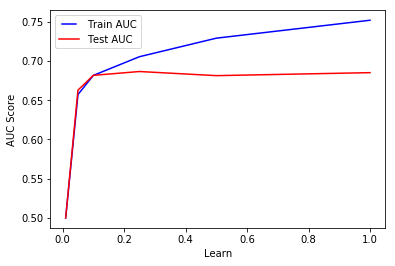

In [423]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

train_results = []
test_results = []

for eta in learning_rates:
    gbclassifier = GradientBoostingClassifier(learning_rate=eta)
    gbclassifier.fit(X_train, y_train)
    
    train_pred = gbclassifier.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = gbclassifier.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('Learn')

While Learning_rates increasing result in overfitting.

##### Lets try with Range of N_estimators

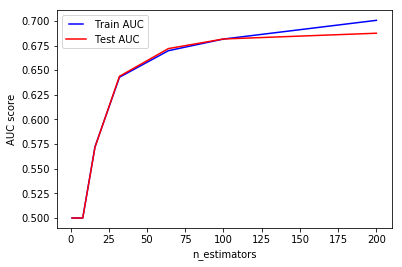

In [424]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results = []
test_results = []

for estimator in n_estimators:
    gbclassifier = GradientBoostingClassifier(n_estimators=estimator)
    gbclassifier.fit(X_train, y_train)
    
    train_pred = gbclassifier.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc =auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = gbclassifier.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

If number of estimator increasing result in overfitting.

##### Lets use Max depth parameter

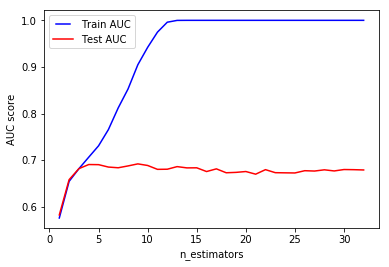

In [426]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results =[]
test_results = []

for max_depth in max_depths:
    gbclassifier = GradientBoostingClassifier(max_depth=max_depth)
    gbclassifier.fit(X_train, y_train)
    
    train_pred = gbclassifier.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = gbclassifier.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

While Max Depth increasing result in overfitting.